In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(u, q, mu):
    return np.sqrt(u ** 2 - 1) * (1.0 / (1.0 + np.exp(q * u - mu)) - 1.0 / (1.0 + np.exp(q * u + mu)))
def fs(u, q, mu):
    return u * (1.0 / (1.0 + np.exp(q * u - mu)) - 1.0 / (1.0 + np.exp(q * u + mu)))
def fi(u, q, mu):
    return (u - 1.0) * (1.0 / (1.0 + np.exp(q * u - mu)) - 1.0 / (1.0 + np.exp(q * u + mu)))
def g(u, q, mu):
    return 1.0 / q * (2.0 * mu + np.log((1.0 + np.exp(q * u - mu))/(1.0 + np.exp(q * u + mu))))
q = 1.0
mu = 5.1
x = np.linspace(1, 10, num=1000)

# Dimus Integralen

Требуется оценить интеграл без пренебрежения чем попало как обычно:
$$J = \int\limits_{1}^{\infty} \sqrt{u^2 - 1} du \left(
\frac{1}{1+e^{qu-\mu}} - \frac{1}{1+e^{qu+\mu}}
\right)$$

Поскольку $u - 1\le \sqrt{u^2 - 1} \le u$, мы можем оценить подынтегральную функцию сверху и снизу.

_подынтегральная функция и оценки сверху и снизу_

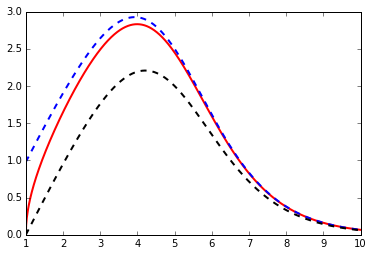

In [3]:
q = 1.0
mu = 5.0
x = np.linspace(1, 10, num=1000)
y = f(x, q, mu)
plt.plot(x, y, 'r-', lw=2)
y2 = fs(x, q, mu)
plt.plot(x, y2, 'b--', lw=2)
y3 = fi(x, q, mu)
plt.plot(x, y3, 'k--', lw=2)
plt.show()

Далее воспользовавших интегрированием по частям, можно получить следующие оценки для интеграла

$$ K \le J \le \frac{1}{q} \log \frac{1 + e^{\mu - q}}{1 + e^{-\mu - q}} + K$$
$$K = \frac{1}{q} \int \limits_{1}^{\infty} \log \frac{1 + e^{\mu - uq}}{1 + e^{-\mu - uq}} du$$

Остается поисследовать _K_:

### $\mu > q$

В таком случае, разбиваем отрезок интегрирования на две части:
$$K = \int \limits_{1}^{\mu / q} + \int \limits_{\mu/q}^{\infty}$$

На $ [1; \mu/q]$ справедливы следующие оценки:
$$\log \frac{1}{2}e^{\mu - qu} \le 
    \log \frac{1 + e^{\mu - q u}} {1 + e^{-\mu - q u}}
        \le \log 2 e^{\mu - qu}$$
На $ [\mu/q; +\infty)$
$$ 0 < 
    \log \frac{1 + e^{\mu - q u}} {1 + e^{-\mu - q u}}
        \le e^{\mu - qu}$$

_пояснительный рисунок ниже_

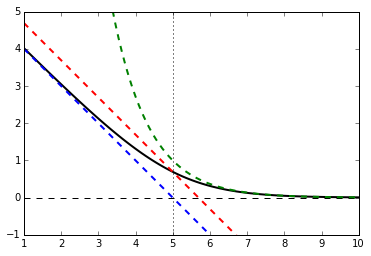

In [4]:
mu = 5.0
q = 1.0

u = np.linspace(1, 10, num=100)
plt.plot(u, np.log(1.0 + np.exp(mu - q * u)), 'k-', lw=2)

plt.plot(u, np.log(2.0 * np.exp(mu - q * u)), 'r--', lw=2)
plt.plot(u, np.log(np.exp(mu - q * u)), 'b--', lw=2)

plt.gca().set_ylim([-1,5])
plt.plot(u, np.exp(mu - q * u), 'g--', lw=2)
plt.hlines([0], 1, 10, linestyles=u'dashed')
plt.vlines([mu / q], -10, 10, linestyles=u'dotted')
plt.show()

На основании этого, получаем 

$$\overline{K} = \frac{1}{q}\int \limits_{1}^{\mu / q} \log 2 e^{\mu - qu}du + \frac{1}{q}\int \limits_{\mu/q}^{\infty} e^{\mu - qu}du=
\frac{1}{q}\left(\frac{\mu^2}{2q}-\mu + \frac{q}{2} + \log 2 \left(\frac{\mu}{q} - 1\right) \right) + \frac{1}{q^2}$$

$$\underline{K} = \frac{1}{q}\int \limits_{1}^{\mu / q} \log \frac{1}{2}e^{\mu - qu}du=
\frac{1}{q}\left(\frac{\mu^2}{2q}-\mu + \frac{q}{2} - \log 2 \left(\frac{\mu}{q} - 1\right) \right)$$


Итого 
$$\overline{J} = \frac{1}{q} \log \frac{1 + e^{\mu - q}}{1 + e^{-\mu - q}} + 
\frac{1}{q} \left(\frac{\mu^2}{2q}-\mu + \frac{q}{2} + 
    \log 2 \left(\frac{\mu}{q} - 1\right) 
            \right) + \frac{1}{q^2}$$
            
            
$$\underline{J} = \frac{1}{q} \left(\frac{\mu^2}{2q}-\mu + \frac{q}{2} - 
    \log 2 \left(\frac{\mu}{q} - 1\right) 
            \right) + \frac{1}{q^2}$$

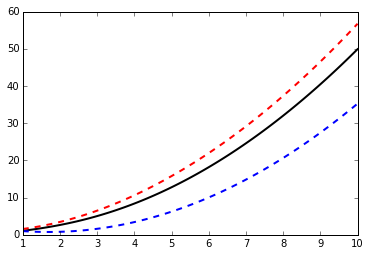

In [9]:
from scipy.integrate import quad
def f(u, q, mu):
    return np.sqrt(u ** 2 - 1) * (1 / (1 + np.exp(q * u - mu)) - 1 / (1 + np.exp(q * u + mu)))

def J(q, mu):
    return quad(lambda x: f(x, q, mu), 1, 100)[0]


def Jupper(q, mu):
    return 1 / q * np.log((1 + np.exp(mu - q))/(1 + np.exp(- mu - q))) + \
            1 / q * (mu ** 2 / 2 / q - mu + q / 2 + np.log(2) * (mu / q - 1)) + 1 / q ** 2
    
def Jlower(q, mu):
    return 1 / q * (mu ** 2 / 2 / q - mu + q / 2 - np.log(2) * (mu / q - 1)) + 1 / q ** 2

q = 1.0
mu = np.linspace(1.0, 10, num=100)
plt.plot(mu, [J(q, _mu) for _mu in mu], 'k-', lw=2)
plt.plot(mu, [Jupper(q, _mu) for _mu in mu], 'r--', lw=2)
plt.plot(mu, [Jlower(q, _mu) for _mu in mu], 'b--', lw=2)

plt.show()
# q = 1, mu = [1; 10]
# черная сплошная -- численное интегрирование исходной функции, 
# красный пунктир -- $\overline{J}$
# синий -- $\underline{J}$
# оценка работает только в случае \mu > q

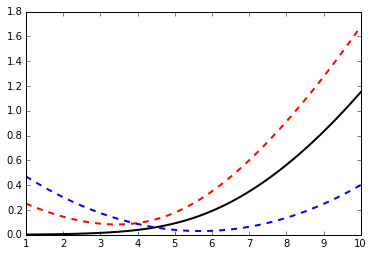

In [10]:
# Пример, когда формулы не работают
q = 5.0
mu = np.linspace(1.0, 10, num=100)
plt.plot(mu, [J(q, _mu) for _mu in mu], 'k-', lw=2)
plt.plot(mu, [Jupper(q, _mu) for _mu in mu], 'r--', lw=2)
plt.plot(mu, [Jlower(q, _mu) for _mu in mu], 'b--', lw=2)

plt.show()

# q = 5, mu = [1; 10]
# черная сплошная -- численное интегрирование исходной функции, 
# красный пунктир -- $\overline{J}$
# синий -- $\underline{J}$
# оценка работает только в случае \mu > q

### $\mu < q$
В этом случае мы сразу попадаем в хвосты:
$$\overline{K} = \frac{1}{q} \int \limits_{1}^{\infty} e^{\mu - qu}du = \frac{1}{q^2} e^{\mu - q}$$
$$\underline{K} = 0$$
При желании, можно улучшить нижнюю оценку, а то этот ноль выглядит беспомощно.


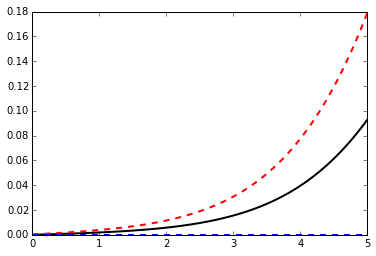

In [7]:
from scipy.integrate import quad
def f(u, q, mu):
    return np.sqrt(u ** 2 - 1) * (1 / (1 + np.exp(q * u - mu)) - 1 / (1 + np.exp(q * u + mu)))

def J(q, mu):
    return quad(lambda x: f(x, q, mu), 1, 100)[0]


def Jupper(q, mu):
    return 1 / q * np.log((1 + np.exp(mu - q))/(1 + np.exp(- mu - q))) + 1 / q ** 2 * np.exp(mu - q)
    
def Jlower(q, mu):
    return 0

q = 5.0
mu = np.linspace(0.0, 5, num=100)
plt.plot(mu, [J(q, _mu) for _mu in mu], 'k-', lw=2)
plt.plot(mu, [Jupper(q, _mu) for _mu in mu], 'r--', lw=2)
plt.plot(mu, [Jlower(q, _mu) for _mu in mu], 'b--', lw=2)
plt.show()

# q = 5, mu = [0; 5]
# черная сплошная -- численное интегрирование исходной функции, 
# красный пунктир -- $\overline{J}$
# синий -- $\underline{J}$
# оценка работает только в случае \mu < q